## 05_Specific_events_analysis

###### At this stage we will select some specific heat waves events and we will go to study them deeply employing the heat stress indices

#### 05.1 - Data connection

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

# Caricamento CSV
df = pd.read_csv(r"C:\Users\andre\OneDrive - Politecnico di Milano\Tesi_di_laurea\elab\04_Outputs\heatstress_all_timestamps_all_years.csv", parse_dates=["Timestamp"])

# Aggiunta della colonna data pura
df["Date"] = df["Timestamp"].dt.date
df["Hour"] = df["Timestamp"].dt.hour

df.head(10)

,Timestamp,Numero Timestamp,Indice,Media (°C),Mediana (°C),95° Perc. (°C),99° Perc. (°C),Massimo (°C),Soglia (°C),Media > Soglia,Mediana > Soglia,95° Perc. > Soglia,99° Perc. > Soglia,Massimo > Soglia,Data,Date,Hour
0,1981-01-01 11:00:00,1,Heat Index,62.587902,56.702271,123.101692,145.308289,187.422272,40.6,si,si,si,si,si,1981-01-01,1981-01-01,11
1,1981-01-01 11:00:00,1,Humidex,-0.210730,0.389642,7.040080,8.284530,10.507238,45.0,no,no,no,no,no,1981-01-01,1981-01-01,11
2,1981-01-01 11:00:00,1,Lethal Heat Stress Index,6.230457,6.795696,12.046806,13.309931,15.195611,27.0,no,no,no,no,no,1981-01-01,1981-01-01,11
3,1981-01-01 11:00:00,1,UTCI,3.051339,3.638378,9.336108,10.814054,13.287813,46.0,no,no,no,no,no,1981-01-01,1981-01-01,11
4,1981-01-01 11:00:00,1,WBGT,0.597468,1.160547,6.130822,6.918025,8.408998,30.0,no,no,no,no,no,1981-01-01,1981-01-01,11
5,1981-01-01 11:00:00,1,Relative Humidity,65.170662,66.382080,89.112541,96.809364,99.193085,80.0,no,no,si,si,si,1981-01-01,1981-01-01,11
6,1981-01-01 12:00:00,2,Heat Index,60.900555,53.021690,128.115738,151.487961,191.071991,40.6,si,si,si,si,si,1981-01-01,1981-01-01,12
7,1981-01-01 12:00:00,2,Humidex,0.419754,1.534759,8.129251,9.231105,11.290494,45.0,no,no,no,no,no,1981-01-01,1981-01-01,12
8,1981-01-01 12:00:00,2,Lethal Heat Stress Index,6.424790,7.170904,12.713841,13.531538,14.955934,27.0,no,no,no,no,no,1981-01-01,1981-01-01,12
9,1981-01-01 12:00:00,2,UTCI,3.618221,4.627268,10.325649,11.570192,14.065192,46.0,no,no,no,no,no,1981-01-01,1981-01-01,12


#### 05.2 - Selection of specific heat wave events and extraction of the warmest hours of the day

##### first event selected
star date     2017-08-01

end date      2017-08-05

##### second event selected
star date     2023-08-19

end date      2023-08-25

In [97]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# === 1. IMPOSTA DATE DELLE DUE HEATWAVE ===
heatwave_1_dates = pd.date_range("2017-08-01", "2017-08-05")
heatwave_2_dates = pd.date_range("2023-08-19", "2023-08-25")

# === 2. CARICA IL FILE .nc ===
path_nc = r"C:\Users\andre\OneDrive\Desktop\Datasets_Geoinfprj\Enlarged_datasets\2m_air_temp\air_temperature_era5-81_23.nc"
ds = xr.open_dataset(path_nc)
ds["time"] = pd.to_datetime(ds["time"].values)

# === 3. IMPOSTA GLI ORARI DA ANALIZZARE ===
target_hours = list(range(11, 18))  # dalle 11 alle 17 incluse

# === 4. FUNZIONE PER CALCOLARE LE STATISTICHE DI UNA HEATWAVE ===
def compute_stats(ds, date_range):
    result = {
        "Hour": [],
        "Mean": [],
        "Median": [],
        "95th Perc": [],
        "99th Perc": [],
        "Max": []
    }
    for hour in target_hours:
        # Filtro per date e ora
        mask = (ds["time"].dt.floor("D").isin(date_range)) & (ds["time"].dt.hour == hour)
        data = ds["T_2M"].sel(time=mask)

        # Flatten dei dati spaziali per tutte le ore selezionate
        values = data.values.reshape(-1)
        values = values[~np.isnan(values)]
        
        result["Hour"].append(f"{hour:02d}:00")
        result["Mean"].append(np.mean(values) - 273.15)
        result["Median"].append(np.median(values) - 273.15)
        result["95th Perc"].append(np.percentile(values, 95) - 273.15)
        result["99th Perc"].append(np.percentile(values, 99) - 273.15)
        result["Max"].append(np.max(values) - 273.15)

    return pd.DataFrame(result)

# === 5. CALCOLO PER LE DUE HEATWAVES ===
df_hw1 = compute_stats(ds, heatwave_1_dates)
df_hw2 = compute_stats(ds, heatwave_2_dates)

# === 6. VISUALIZZAZIONE AFFIANCATA IN UN'UNICA TABELLA ===
final_table = pd.concat([
    df_hw1.set_index("Hour").add_prefix("HW1_"),
    df_hw2.set_index("Hour").add_prefix("HW2_")
], axis=1).reset_index().rename(columns={"index": "Hour"})

# Arrotonda tutti i valori numerici a 2 cifre decimali
final_table_rounded = final_table.copy()
final_table_rounded.iloc[:, 1:] = final_table_rounded.iloc[:, 1:].round(2)

# Colonne numeriche da formattare
numeric_cols = final_table_rounded.select_dtypes(include=[np.number]).columns

# Funzione per gradiente singolo per colonna
def gradient_column(col):
    return pd.DataFrame(
        data=mcolors.to_hex(plt.cm.YlOrRd((col - col.min()) / (col.max() - col.min()))),
        index=col.index,
        columns=[col.name]
    )

# Funzione per evidenziare il massimo
# Funzione per stilizzare l'intera tabella colonna per colonna
def style_by_col_gradient(df):
    styled_df = df.copy()
    styles = pd.DataFrame("", index=df.index, columns=df.columns)

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            values = df[col]
            normed = (values - values.min()) / (values.max() - values.min())
            colors = normed.map(lambda x: mcolors.to_hex(plt.cm.YlOrRd(x)))
            max_val = values.max()

            for i in values.index:
                cell_color = colors[i]
                font_color = "white" if values[i] == max_val else "black"
                styles.loc[i, col] = f"background-color: {cell_color}; color: {font_color};"
        else:
            styles[col] = ""  # nessun colore per colonne testuali

    return df.style.apply(lambda _: styles, axis=None).format("{:.2f}", subset=df.select_dtypes(include=[np.number]).columns)


# Applica lo stile finale
styled = style_by_col_gradient(final_table_rounded)
styled

,Hour,HW1_Mean,HW1_Median,HW1_95th Perc,HW1_99th Perc,HW1_Max,HW2_Mean,HW2_Median,HW2_95th Perc,HW2_99th Perc,HW2_Max
0,11:00,33.37,36.21,40.84,41.64,43.25,32.35,35.04,40.02,40.87,42.13
1,12:00,34.48,37.25,42.40,43.16,45.06,33.35,36.11,41.35,42.26,44.11
2,13:00,35.26,37.97,43.61,44.45,46.32,34.06,36.88,42.38,43.22,44.94
3,14:00,35.57,38.22,44.26,45.14,46.86,34.29,37.21,42.90,43.71,45.27
4,15:00,35.35,37.91,44.30,45.12,46.87,34.03,37.07,42.84,43.67,45.25
5,16:00,34.56,37.13,43.72,44.57,45.98,33.26,36.22,42.21,43.10,44.13
6,17:00,33.19,35.82,42.45,43.49,44.98,31.97,34.81,40.97,42.07,43.19


#### 05.3 - Selection of warmest day of each heat 

In [42]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# === 1. DEFINISCI LE DATE DELLE DUE HEATWAVES ===
heatwave_1_dates = pd.date_range("2017-08-01", "2017-08-05")
heatwave_2_dates = pd.date_range("2023-08-19", "2023-08-25")

# === 2. CARICA IL DATASET ===
path_nc = r"C:\Users\andre\OneDrive\Desktop\Datasets_Geoinfprj\Enlarged_datasets\2m_air_temp\air_temperature_era5-81_23.nc"

ds = xr.open_dataset(path_nc)
ds["time"] = pd.to_datetime(ds["time"].values)

# === 3. FUNZIONE PER CALCOLARE LE STATISTICHE GIORNO PER GIORNO ===
def compute_daily_stats(ds, date_range):
    rows = []
    for date in date_range:
        mask = ds["time"].dt.date == date.date()
        data = ds["T_2M"].sel(time=mask)
        values = data.values.flatten()
        values = values[~np.isnan(values)]
        rows.append({
            "Date": date.strftime("%Y-%m-%d"),
            "Mean": np.mean(values) - 273.15,
            "Median": np.median(values) - 273.15,
            "95th Perc": np.percentile(values, 95) - 273.15,
            "99th Perc": np.percentile(values, 99) - 273.15,
            "Max": np.max(values) - 273.15,
        })
    return pd.DataFrame(rows)

df1 = compute_daily_stats(ds, heatwave_1_dates)
df2 = compute_daily_stats(ds, heatwave_2_dates)

# === 4. TRASPOSIZIONE, RINOMINA E ARROTONDAMENTO ===
df1_named = df1.set_index("Date").T
df1_named.columns = [f"HW1_{col}" for col in df1_named.columns]

df2_named = df2.set_index("Date").T
df2_named.columns = [f"HW2_{col}" for col in df2_named.columns]

final = pd.concat([df1_named, df2_named], axis=1)

# Arrotonda i valori per i calcoli (non serve per visualizzazione, ma utile per sicurezza)
final_rounded = final.round(2)

# === 5. STYLING: EVIDENZIA MASSIMI E COLORA OGNI RIGA INDIVIDUALMENTE PER HEATWAVE ===
def style_heatwaves_gradient(df):
    df = df.round(2)  # arrotonda i valori a 2 decimali

    styles = pd.DataFrame('', index=df.index, columns=df.columns)

    for hw_prefix in ["HW1_", "HW2_"]:
        cols = [c for c in df.columns if c.startswith(hw_prefix)]
        for stat in df.index:
            values = df.loc[stat, cols]
            normed = (values - values.min()) / (values.max() - values.min())
            colors = normed.map(lambda x: mcolors.to_hex(plt.cm.YlOrRd(x)))

            # assegna il colore a ciascuna cella
            for col in cols:
                styles.loc[stat, col] = f'background-color: {colors[col]}; color: black;'

            # evidenzia il massimo con rosso pieno e testo bianco
            max_col = values.idxmax()
            styles.loc[stat, max_col] = 'background-color: #B22222; color: white;'

    return df.style.apply(lambda _: styles, axis=None).format("{:.2f}")

# Usa così:
styled = style_heatwaves_gradient(final)
styled


,HW1_2017-08-01,HW1_2017-08-02,HW1_2017-08-03,HW1_2017-08-04,HW1_2017-08-05,HW2_2023-08-19,HW2_2023-08-20,HW2_2023-08-21,HW2_2023-08-22,HW2_2023-08-23,HW2_2023-08-24,HW2_2023-08-25
Mean,33.82,34.46,35.26,35.05,34.11,32.27,32.45,33.56,34.06,34.35,33.93,32.69
Median,36.52,37.05,37.71,37.54,36.98,35.20,35.30,36.39,37.05,37.38,36.68,35.23
95th Perc,43.03,43.51,44.31,43.75,43.07,40.66,40.35,41.31,42.13,43.13,42.81,41.91
99th Perc,44.19,44.40,45.22,44.50,44.00,41.40,41.36,42.06,43.11,43.83,43.51,42.69
Max,45.89,45.98,46.87,46.36,46.13,42.78,43.63,43.62,45.01,45.27,44.77,44.31


#### 05.4 - Heat stress maps of warmest day and hour

Function defining the heat indices

In [49]:
def calculate_humidex(Ta_k, Td_k):
    """
    Calcola l'Humidex in °C usando la formula di Masterson/Chin.
    Parametri:
      - Ta_k: temperatura dell'aria in Kelvin
      - Td_k: temperatura di rugiada in Kelvin
    Ritorna:
      - Humidex in °C
    """
    # Conversione in °C
    Ta_c = Ta_k - 273.15
    Td_c = Td_k - 273.15

    # Evita valori troppo bassi per Td
    Td_c = np.maximum(Td_c, -73.15)  # ~200 K

    # Calcolo della pressione di vapore (e) in hPa
    exponent = 5417.7530 * ((1.0 / 273.16) - (1.0 / (Td_c + 273.16)))
    e = 6.11 * np.exp(exponent)

    # Formula Humidex
    humidex_c = Ta_c + 0.5555 * (e - 10.0)
    return humidex_c


def calculate_relative_humidity(Ta_c, Td_c):
    """
    Calcola l'umidità relativa in %,
    assumendo Ta_c e Td_c in °C.
    """
    RH = 100.0 * np.exp((17.625 * Td_c) / (243.04 + Td_c)
                        - (17.625 * Ta_c) / (243.04 + Ta_c))
    return RH


def calculate_wbt(Ta_c, RH):
    """
    Calcola la Wet-Bulb Temperature (WBT) in °C (formula semplificata di Stull).
    Parametri:
      - Ta_c: temperatura in °C
      - RH: umidità relativa in %
    """
    WBT_c = (Ta_c * np.arctan(0.151977 * np.sqrt(RH + 8.313659))
             + np.arctan(Ta_c + RH)
             - np.arctan(RH - 1.676331)
             + 0.00391838 * RH**1.5 * np.arctan(0.023101 * RH)
             - 4.686035)
    return WBT_c


def calculate_wbgt(Ta_c, WBT_c):
    """
    Calcola WBGT in °C con la formula semplificata:
      WBGT = 0.7 * WBT + 0.3 * Ta
    Parametri:
      - Ta_c: temperatura in °C
      - WBT_c: Wet-Bulb Temperature in °C
    """
    WBGT_c = 0.7 * WBT_c + 0.3 * Ta_c
    return WBGT_c


def calculate_lethal_heat_stress_index(WBT_c, RH):
    """
    Calcola Lethal Heat Stress Index (Ls) in °C con la formula:
      Ls = WBT + 4.5 * (1 - (RH/100)^2)
    Parametri:
      - WBT_c: Wet-Bulb Temperature in °C
      - RH: umidità relativa in %
    """
    Ls_c = WBT_c + 4.5 * (1.0 - (RH / 100.0)**2)
    return Ls_c


def calculate_utci(Ta_c, RH):
    """
    Calcola una versione semplificata di UTCI in °C,
    Parametri:
      - Ta_c: temperatura in °C
      - RH: umidità relativa in %
    """
    # Pressione di vapore approssimata
    pa = RH / 100.0 * 6.105 * np.exp(17.27 * Ta_c / (237.7 + Ta_c))

    # Formula semplificata
    UTCI_c = (Ta_c
              + 0.607562
              + 0.022771 * Ta_c
              - 0.003578 * RH
              - 0.000119 * Ta_c * RH)
    return UTCI_c

Map creation displying the heat indices for warmest hour and day of the identyfied heatwaves

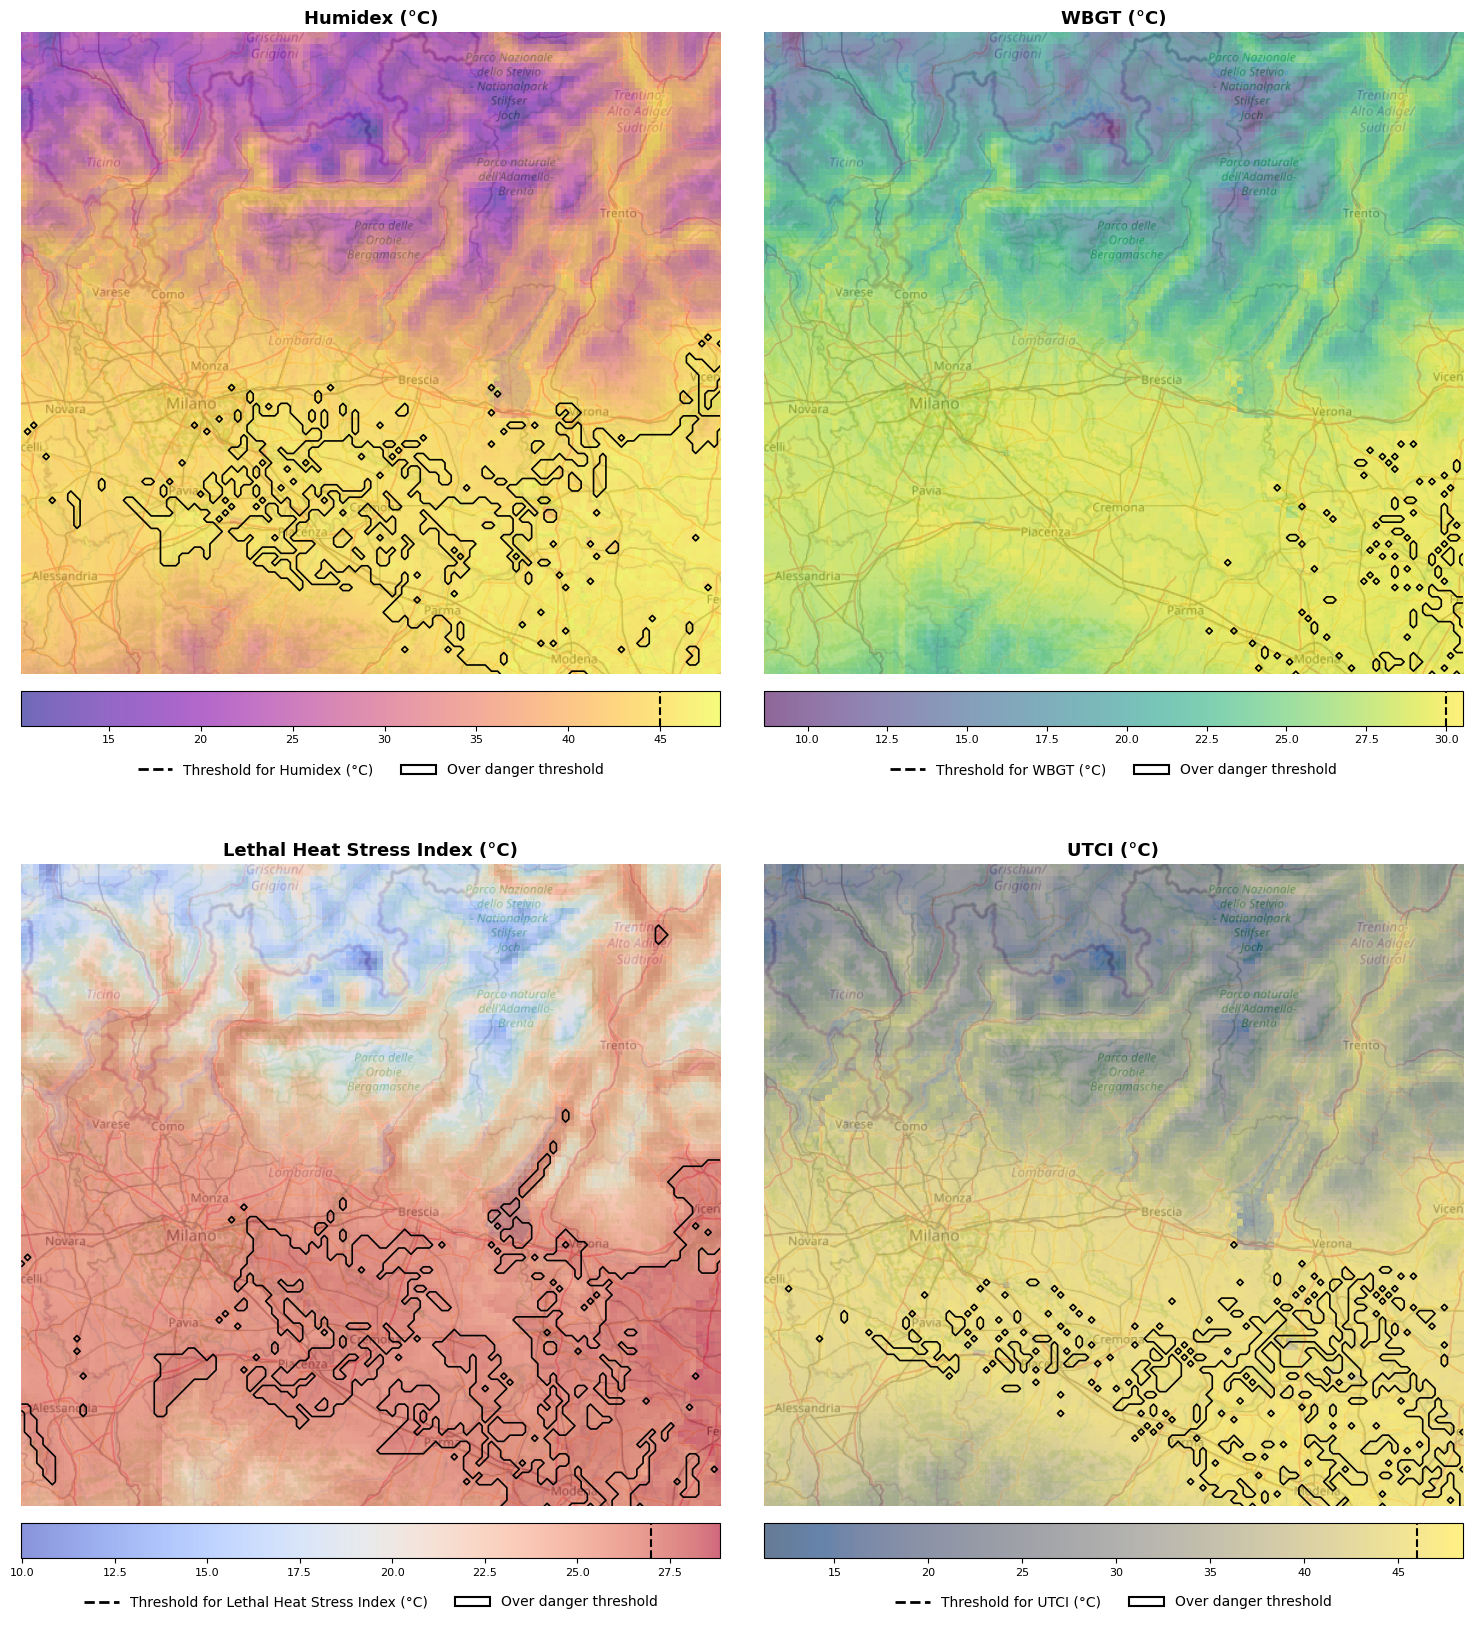

In [95]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
from pyproj import Transformer
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

# === PARAMETRI ===
selected_date = "2017-08-03"
selected_hour = 14

# === CARICAMENTO DATI ===
ds_temp = xr.open_dataset("C:/Users/andre/OneDrive/Desktop/Datasets_Geoinfprj/Enlarged_datasets/2m_air_temp/air_temperature_era5-81_23.nc")
ds_dew = xr.open_dataset("C:/Users/andre/OneDrive/Desktop/Datasets_Geoinfprj/Enlarged_datasets/dew_point_temp/dew_point_temp_81_23.nc")
ds_temp["time"] = pd.to_datetime(ds_temp["time"].values)
ds_dew["time"] = pd.to_datetime(ds_dew["time"].values)

timestamp = pd.Timestamp(f"{selected_date} {selected_hour:02d}:00")
T_k = ds_temp["T_2M"].sel(time=timestamp)
Td_k = ds_dew["TD_2M"].sel(time=timestamp)
Td_k = Td_k.where(Td_k > 243.15).interpolate_na(dim="rlat", method="linear").interpolate_na(dim="rlon", method="linear")

# === CALCOLO INDICI ===
T_c = T_k - 273.15
Td_c = Td_k - 273.15
RH = calculate_relative_humidity(T_c, Td_c)
humidex = calculate_humidex(T_k, Td_k)
wbt = calculate_wbt(T_c, RH)
wbgt = calculate_wbgt(T_c, wbt)
lhs = calculate_lethal_heat_stress_index(wbt, RH)
utci = calculate_utci(T_c, RH)

# === SOGHIE DI PERICOLOSITÀ ===
thresholds = {
    "Humidex (°C)": 45,
    "WBGT (°C)": 30,
    "Lethal Heat Stress Index (°C)": 27,
    "UTCI (°C)": 46
}

# === FUNZIONE DI PLOT MULTIPLO CON SOGLIE ===
def plot_4maps_with_thresholds(datasets, titles, cmaps, thresholds, alpha=0.6):
    fig, axs = plt.subplots(2, 2, figsize=(15, 17))

    lat = ds_temp["lat"].values
    lon = ds_temp["lon"].values
    lon1d = lon[0, :] if lon.ndim == 2 else lon
    lat1d = lat[:, 0] if lat.ndim == 2 else lat

    transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
    lon_mesh, lat_mesh = np.meshgrid(lon1d, lat1d)
    x_mesh, y_mesh = transformer.transform(lon_mesh, lat_mesh)

    axs = axs.flatten()

    for i, (data, title, cmap) in enumerate(zip(datasets, titles, cmaps)):
        ax = axs[i]
        ax.set_xlim(x_mesh.min(), x_mesh.max())
        ax.set_ylim(y_mesh.min(), y_mesh.max())
        ctx.add_basemap(ax, crs="EPSG:3857", source=ctx.providers.OpenStreetMap.Mapnik, attribution=False)

        im = ax.imshow(data.values, extent=[x_mesh.min(), x_mesh.max(), y_mesh.min(), y_mesh.max()],
                       origin='lower', cmap=cmap, alpha=alpha)
        ax.set_title(title, fontsize=13, fontweight='bold')
        ax.axis("off")

        # === Colorbar ===
        cbar = plt.colorbar(im, ax=ax, orientation="horizontal", pad=0.02)
        cbar.ax.tick_params(labelsize=8)

        # === Calcolo threshold
        threshold = thresholds.get(title, None)
        if threshold is not None:
            # Linea sulla colorbar
            cbar.ax.axvline(x=threshold, color="black", linestyle="--", linewidth=1.5)

            # Contorno dei pixel oltre soglia
            mask = data.values > threshold
            ax.contour(x_mesh, y_mesh, mask.astype(int), levels=[0.5], colors='black',
                       linewidths=1.2, linestyles='solid')

            # === LEGENDA CUSTOM ===
            line_element = Line2D([0], [0], color="black", linestyle="--", linewidth=2,
                                  label=f"Threshold for {title}")
            rect_element = Rectangle((0, 0), 1, 1, facecolor="none", edgecolor="black", linewidth=1.5,
                                     label="Over danger threshold")
            ax.legend(handles=[line_element, rect_element],
                      loc="lower center", bbox_to_anchor=(0.5, -0.18),
                      ncol=2, fontsize=10, frameon=False,
                      handlelength=2.5, handletextpad=0.8)

    plt.tight_layout()
    return fig

# === ESECUZIONE ===
fig = plot_4maps_with_thresholds(
    datasets=[humidex, wbgt, lhs, utci],
    titles=["Humidex (°C)", "WBGT (°C)", "Lethal Heat Stress Index (°C)", "UTCI (°C)"],
    cmaps=["plasma", "viridis", "coolwarm", "cividis"],
    thresholds=thresholds
)
plt.show()